In [6]:
!pip install h5py
!pip install SimpleITK
!pip install scikit-image
!pip install scipy
!pip install tqdm
!pip install matplotlib

You should consider upgrading via the 'C:\Users\dionn\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\dionn\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\dionn\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\dionn\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\dionn\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'C:\Users\dionn\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


     ---------------------------------------- 7.6/7.6 MB 12.5 MB/s eta 0:00:00
     ---------------------------------------- 98.3/98.3 KB 2.8 MB/s eta 0:00:00
     -------------------------------------- 163.0/163.0 KB 3.2 MB/s eta 0:00:00
     -------------------------------------- 55.3/55.3 KB 957.9 kB/s eta 0:00:00
     ---------------------------------------- 1.0/1.0 MB 7.1 MB/s eta 0:00:00


In [1]:
import glob
import os

import h5py
import numpy as np
import SimpleITK as sitk
import numpy as np
from scipy.ndimage import zoom

In [6]:
import os
from tqdm import tqdm
from skimage.transform import resize

def get_file_list(directory_path):
    file_list = []
    for file in os.listdir(directory_path):
        file = os.path.join(directory_path, file)
        if(file[-10:-3]=='patient'):
            file_list.append(file)
    return file_list

def get_frame_list(dir):
    frames = []
    for file in os.listdir(dir):
        file = os.path.join(dir, file)
        ## extract frames
        if(file[-14:-9]=='frame'):
            frames.append(file)
    return frames

def reshape_mask(mask):
    # Specify the desired new shape
    new_depth  = 10
    new_width = 256
    new_height = 256

    # Reshape the mask using zoom and nearest neighbor interpolation
    resized_mask = zoom(mask, (new_depth / mask.shape[0], new_width / mask.shape[1], new_height / mask.shape[2]), order=0)

    # Convert the resized_mask to integers to remove any interpolated values
    resized_mask = resized_mask.astype(np.int32)
    return resized_mask


### read image and mask
def get_image(frame):
    ### read and process of image
    new_depth  = 10
    new_width = 256
    new_height = 256
    img_itk = sitk.ReadImage(frame)
    origin = img_itk.GetOrigin()
    spacing = img_itk.GetSpacing()
    direction = img_itk.GetDirection()
    image4d = sitk.GetArrayFromImage(img_itk)
    image = image4d[0,:,:,:]   
    image = (image - image.min()) / (image.max() - image.min())
    image = image.astype(np.float32)
    image = resize(image, (new_depth,new_width, new_height),anti_aliasing=True , order=5,mode='constant')
    return image 


def get_image_data(folders):
    images = []
    for folder in tqdm(folders): 
        ### get frame list 
        frames= get_frame_list(folder)

        ### read image 
        for frame in frames:
            image = get_image(frame)
            # print(image.shape)
            images.append(image)

    # Convert the list to a NumPy array
    images = np.array(images)
    print(images.shape)
    return images


# Example usage:
directory_path = r'C:\Users\dionn\OneDrive\Documenten\DLMIA\secret_test'

### read folders 
folders = get_file_list(directory_path)

### get final iamges and masks 
images = get_image_data(folders)

### save numpy files 
# Save the array as a NumPy file
np.save('ExternalTestSet_25frames.npy', images)





100%|██████████| 25/25 [02:13<00:00,  5.33s/it]


(25, 10, 256, 256)


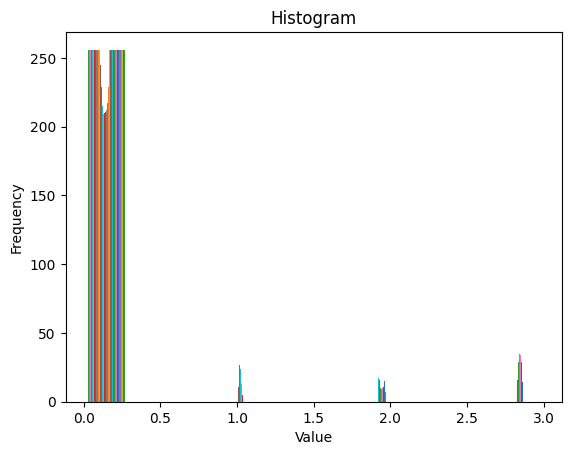

In [7]:


import matplotlib.pyplot as plt

# Assuming you have data stored in a NumPy array called 'data'
# Plot the histogram
plt.hist(masks[0][5,:,:])  # Adjust the number of bins as needed
plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()





10
(10, 256, 256)


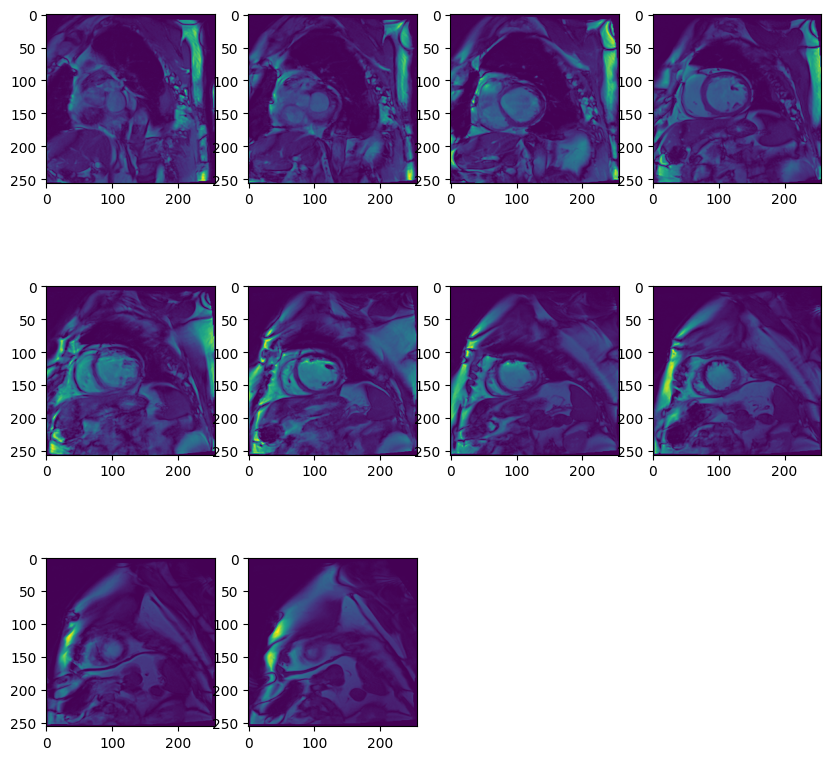

In [5]:
import matplotlib.pyplot as plt
print(len(images[0]))
plt.figure(figsize=(10,10))
for i in range(len(images[0])):
    plt.subplot(3,4,i+1)
    plt.imshow(images[0][i,:,:])
print(images[0].shape)



(10, 256, 256)


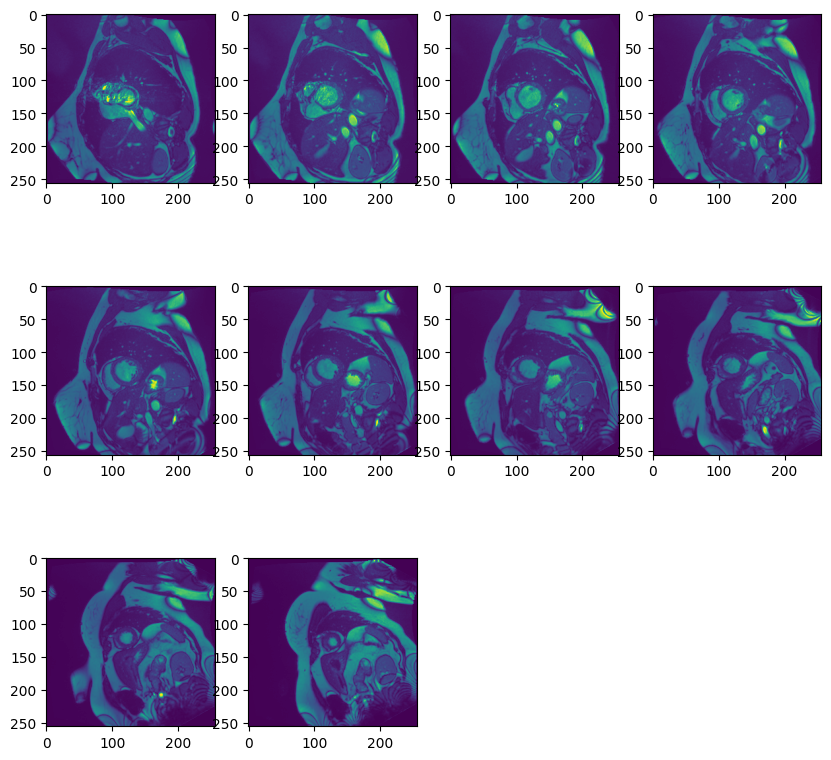

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(len(images[1])):
    plt.subplot(3,4,i+1)
    plt.imshow(images[1][i,:,:])
print(images[1].shape)



## Preprocessing the test data 

In [11]:
# Example usage:
directory_path = r'C:\Users\dionn\OneDrive\Documenten\DLMIA\ACDC\database\testing'

### read folders 
folders = get_file_list(directory_path)

### get final iamges and masks 
images, masks = get_image_mask_data(folders)

### save numpy files 
# Save the array as a NumPy file
np.save('PreprocessedData\Test_img.npy', images)
np.save('PreprocessedData\Test_msk.npy', masks)


100%|██████████| 50/50 [07:51<00:00,  9.44s/it]


(100, 10, 256, 256) (100, 10, 256, 256)


In [15]:
### load data 

img_train = np.load("PreprocessedData\Train_img_10frame_256.npy")


In [16]:
print(img_train.shape)

(100, 10, 256, 256)
